## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data\stud.csv')

In [4]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [5]:
df.shape

(1000, 8)

In [6]:
# %pip install pickle

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
print(df['gender'].unique())

df['race_ethnicity']= df['race_ethnicity'].str.replace('group', '')
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())

['female' 'male']
[' B' ' C' ' A' ' D' ' E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [34]:
# Seperate numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

numeric_features
cat_features


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [35]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88


In [39]:
df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['total']
df['avg'] = df['total']/3 
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,avg
0,female,B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,C,some college,standard,completed,69,90,88,247,82.333333
2,female,B,master's degree,standard,none,90,95,93,278,92.666667


In [48]:
### No of students with 100 marks 

reading_full = df[df['reading_score'] == 100]['avg'].count()
maths_full = df[df['math_score']==100]['avg'].count()
writing_full = df[df['writing_score'] == 100]['avg'].count()

print(f'maths {maths_full}, writing {writing_full} , reading {reading_full}')

maths 7, writing 14 , reading 17


In [51]:
## Number less then 20 

maths_less = df[df['math_score'] < 21 ]['avg'].count()
writing_less = df[df['writing_score'] < 21 ]['avg'].count()
read_less = df[df['reading_score'] < 21 ]['avg'].count()

print(f'maths {maths_less}, writing {writing_less} , reading {read_less}')

maths 4, writing 3 , reading 1


### EDA 

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

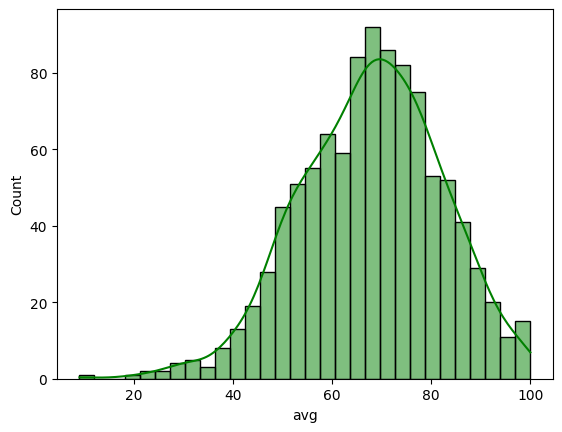

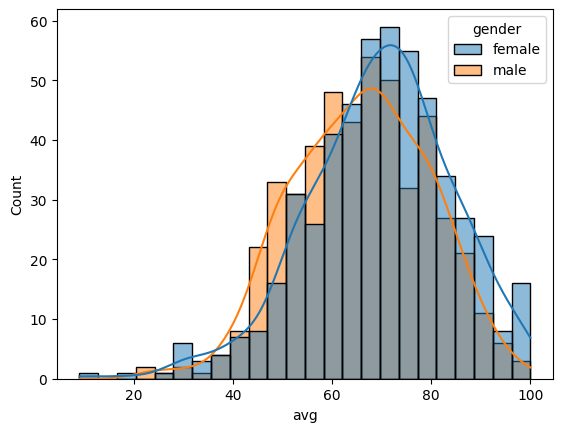

In [58]:
sns.histplot(data=df,x='avg',bins=30,kde=True,color='g')
plt.show()
sns.histplot(data=df,x='avg',kde=True,hue='gender')
plt.show()

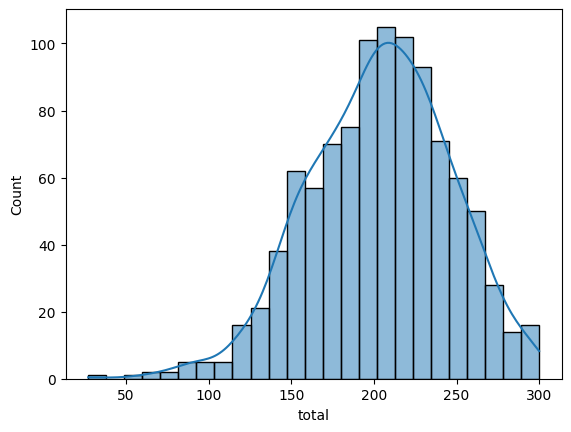

(1000, 10)


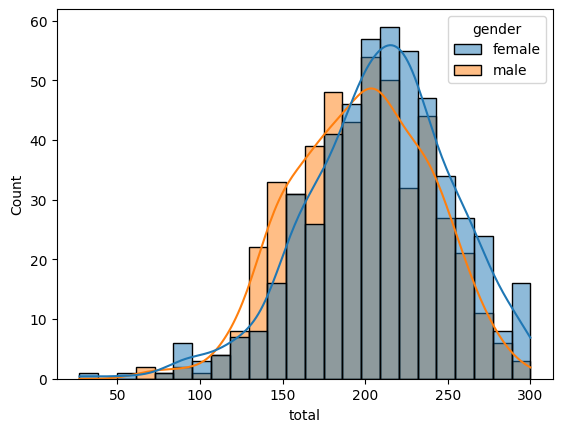

In [63]:
sns.histplot(data=df, x= 'total', bins=25, kde = True)
plt.show()
print(df.shape)
sns.histplot(data = df, x = 'total', kde = True, hue = 'gender')
plt.show()

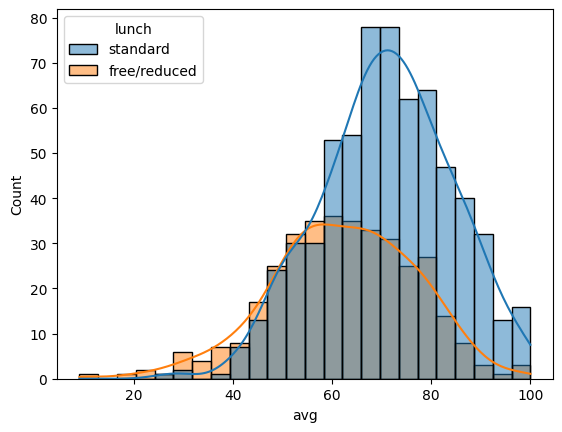

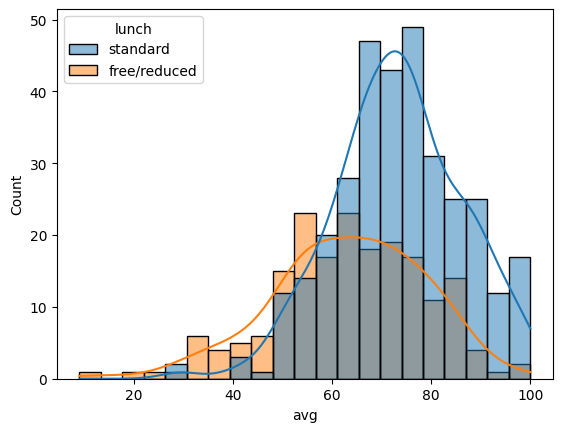

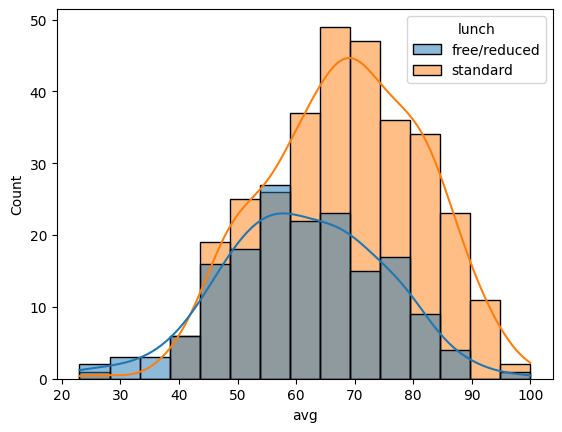

In [70]:
sns.histplot(data = df, x = 'avg', hue = 'lunch',kde=True)
plt.show()
sns.histplot(data = df[df.gender == 'female'], x= 'avg', kde=True,hue = 'lunch')
plt.show()
sns.histplot(data = df[df.gender == 'male'], x= 'avg', kde=True,hue = 'lunch')
plt.show()

ValueError: Could not interpret value `parental level of education` for `hue`. An entry with this name does not appear in `data`.

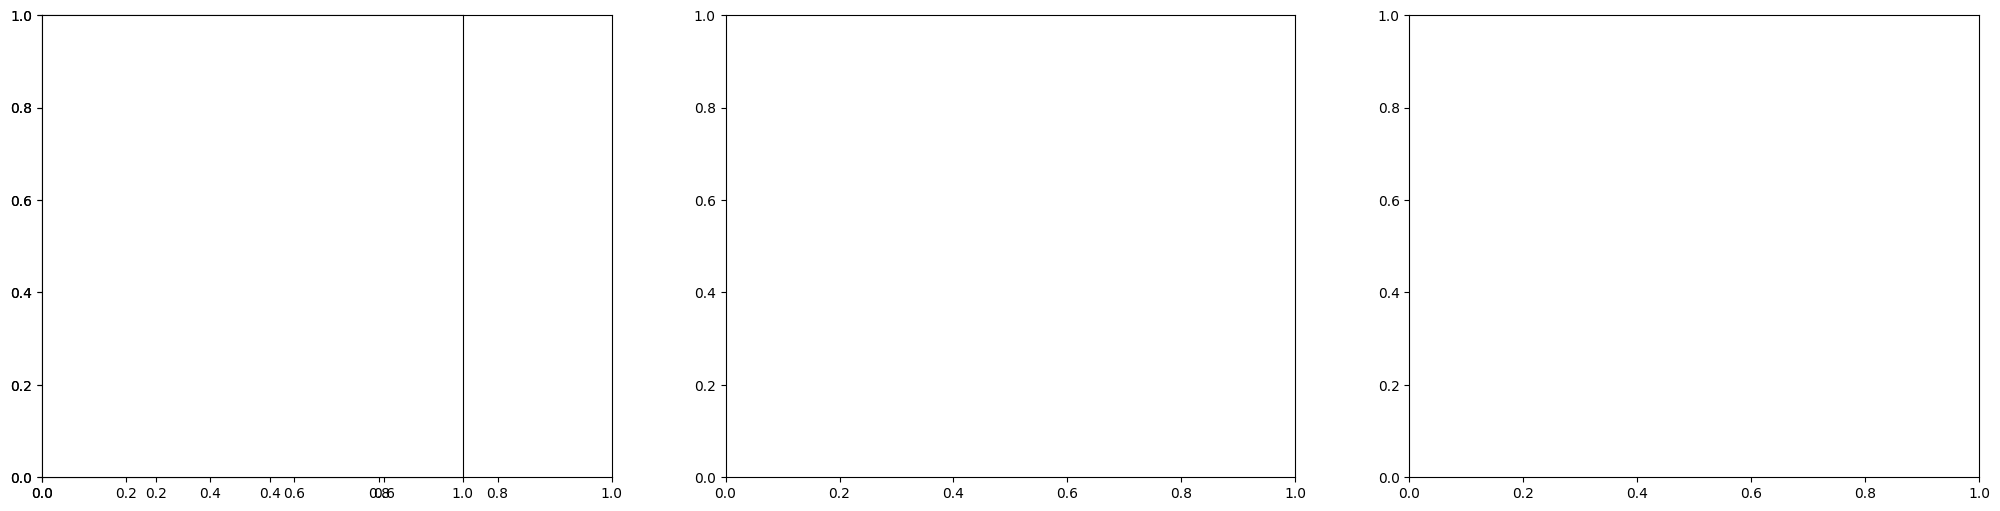

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avg',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='avg',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='avg',kde=True,hue='parental level of education')
plt.show()

In [ ]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

ValueError: Could not interpret value `math score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1800x800 with 0 Axes>